In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

all_data = pd.read_csv(data_path + 'all_data_5_22_17_10_42.csv' , index_col= 'PassengerId')

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [6]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [7]:
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned
PassengerId,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9


In [8]:
all_data['log_Fare'] = np.log(all_data['Fare'])
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned,log_Fare
PassengerId,,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9,1.981001
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2,4.266662
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0,2.070022
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0,3.972177
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0,2.085672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0,2.085672
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6,4.690430
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9,1.981001


In [90]:
all_data['Family'] = all_data['SibSp'] + all_data['Parch']

all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned,log_Fare,Family
PassengerId,,,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9,1.981001,1
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2,4.266662,1
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0,2.070022,0
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0,3.972177,1
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0,2.085672,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0,2.085672,0
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6,4.690430,0
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9,1.981001,0


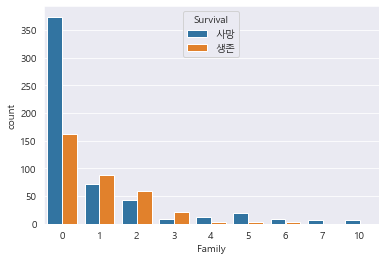

In [91]:
ax = sns.countplot(x='Family',  hue = 'Survival' , data = all_data)
plt.show()

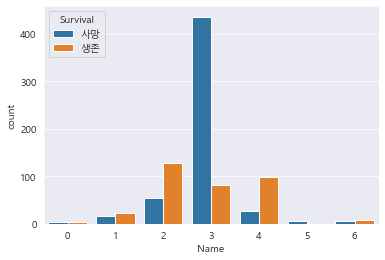

In [92]:
ax = sns.countplot(x='Name',  hue = 'Survival' , data = all_data)
plt.show()

## Cabin 전처리 해보기

In [93]:
all_data['Cabin'].value_counts()

8    1014
2      94
1      65
3      46
4      41
0      22
5      21
6       5
7       1
Name: Cabin, dtype: int64

In [94]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1309 non-null   int64  
 1   Sex          1309 non-null   int64  
 2   Embarked     1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Age_binned   1309 non-null   object 
 5   Pclass       1309 non-null   int64  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Survival     891 non-null    object 
 9   Cabin        1309 non-null   int64  
 10  Fare         1309 non-null   float64
 11  Fare_binned  1309 non-null   float64
 12  log_Fare     1309 non-null   float64
 13  Family       1309 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 185.7+ KB


In [95]:
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned,log_Fare,Family
PassengerId,,,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9,1.981001,1
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2,4.266662,1
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0,2.070022,0
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0,3.972177,1
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0,2.085672,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0,2.085672,0
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6,4.690430,0
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9,1.981001,0


## 성능 개선 없이 그냥 베이스라인 모델 돌려보기

In [96]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성

all_data_encoded = encoder.fit_transform(all_data)

all_data_encoded

<1309x901 sparse matrix of type '<class 'numpy.float64'>'
	with 18326 stored elements in Compressed Sparse Row format>

In [ ]:
features2 = all_data.columns.tolist()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯을 생성할 크기 설정
plt.figure(figsize=(12, 8))

# 피처들의 리스트
features = features2

# 피처들에 대한 countplot 그리기
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, hue='Survival', data=all_data)
    plt.title(f'{feature} - Survived Countplot')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


In [ ]:
import seaborn as sns

# 피처들의 리스트
features = features

# 각 피처별 'Survived'와의 상관계수 계산
correlations = all_data[features + ['Survival']].corr()
# filtered_correlations = correlations[correlations['Survival'].abs() >= 0.2]

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='RdYlBu')
plt.title("Correlation Heatmap")

# 그래프 출력
plt.show()


In [ ]:
object_col = ['Name' , 'Sex' , 'Embarked'  ,'Age_binned', 'Cabin' ]
binary_col = ['Fare' , 'Pclass', 'log_Fare'  ,'Family']

idx_col = ['Age_binned' , 'Fare_binned']

## 타깃값 분포

In [ ]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬


## 연속형 피처 분포

In [ ]:
all_data_bin = all_data[binary_col]

all_data_bin

In [ ]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 히스토그램과 정규분포 곡선 그리기
sns.histplot(all_data['Age'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data['Age'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Age distribution (mu={mu:.2f}, std={std:.2f})')
plt.show()

## 모델링_with 피처엔지니어링

- 명목형 피처는 OneHotEncoding ==> Name , Sex , Embarked

- Pclass 는 MinMaxScaler로

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # 원-핫 인코더 생성
# nom_feature = ['Name','Sex' , 'Embarked', 'Cabin' , 'SibSp' , 'Parch']
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[object_col])
print(type(encoded_nom_matrix))
encoded_nom_matrix

In [ ]:
# 범주형 변수의 원래 이름을 추출합니다.
#
nom_feature_names = []
for feature in object_col:
    categories = onehot_encoder.categories_[object_col.index(feature)]
    for category in categories:
        nom_feature_names.append(f"{feature}_{category}")



# 결과를 출력합니다.
print(nom_feature_names)


In [ ]:
print(type(encoded_nom_matrix))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
ax = sns.countplot(x='Fare_binned', hue='Survival', data=all_data)

# x 축 값이 잘 보이도록 설정
ax.tick_params(axis='x', labelrotation=45)

# 그래프 출력
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 히스토그램 그리기
sns.histplot(all_data['Fare_binned'].dropna(), kde=True, stat='density', color='skyblue', alpha=0.7)

# 정규분포 계산
mu, std = norm.fit(all_data['Fare_binned'].dropna())

# x 값 범위 설정
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규분포 그래프 그리기
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

# 그래프 제목 설정
plt.title(f'Fare 범위(log화) (mu={mu:.2f}, std={std:.2f})')

# 그래프 출력
plt.show()


# 인코딩 및 스케일링 된 피처 합치기

In [ ]:
nom_feature_names

In [ ]:
all_data2 = all_data[binary_col[1:]]
all_data2

In [ ]:
encoded_nom_matrix

In [ ]:
# encoded_stan

In [ ]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data2),
                               encoded_nom_matrix],
                              format='csr')

all_data_sprs

In [ ]:
CSR_NAMES = all_data2.columns.tolist() + nom_feature_names
CSR_NAMES

In [ ]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values

In [ ]:
print(X.toarray())

In [ ]:
#랜덤포레스트

## LightGBM 모델 하이퍼파라미터 최적화

In [ ]:
all_data_sprs

## LightGBM 과 XGBoost 앙상블 & DescisionTree & RandomForest

In [ ]:
# X_train

In [ ]:
# import datetime
#
# # 현재 날짜와 시각 구하기
# now = datetime.datetime.now()
# date_list = [now.month, now.day, now.hour, now.minute, now.second]
# # 현재 날짜와 시각 출력하기
# print("현재 날짜 및 시각 : ", date_list)
#
# # 제출 파일 생성
#
# submission['Survived'] = y_pred
# submission.to_csv(f'submission_GridSearch_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

In [ ]:
all_data

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)


In [ ]:
X_test

In [ ]:
submission

In [ ]:
X

 위의 코드는 이미 K-Fold 교차 검증을 적용하고 있습니다. GridSearchCV 함수의 cv 매개변수를 5로 설정하여 5-Fold 교차 검증을 수행하고 있습니다. cv 매개변수를 원하는 K 값으로 변경하여 다른 K-Fold 값에서 교차 검증을 수행할 수 있습니다.

따라서, 위의 코드는 이미 K-Fold 교차 검증을 시행하고 있으며, 각 Fold에서의 최적 모델과 파라미터를 출력하고 있습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid = {
    'max_depth': [None, 1, 3, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(dt_model, param_grid, cv=10 , n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_dc = grid_search.best_estimator_
best_params_grid_search_dc = grid_search.best_params_
print("Best Model:", best_model_grid_search_dc)
print("Best Parameters:", best_params_grid_search_dc)

In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_dc.score(X_valid , y_valid)}')

In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_dc.score(X_train , y_train)}')

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize =  (30,15)) # 그래프 크기 설정

ax =plot_tree(best_model_grid_search_dc, max_depth=5, fontsize=15)
# 트리 그래프 출력

plt.show()

In [ ]:
y_preds = best_model_grid_search_dc.predict(X_test)

y_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_DescisionTree_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## LightGBM 모델

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

# LightGBM 모델 생성
lgb_model = lgb.LGBMClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lgb = {
    'max_depth': [3,4],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'min_child_samples': [1],
    'subsample': [0.05],
    'colsample_bytree': [0.9],
    'reg_alpha': [0.1],
    'reg_lambda': [0.0]
}


# 그리드 서치 객체 생성
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_lgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lgb = grid_search_lgb.best_estimator_
best_params_grid_search_lgb = grid_search_lgb.best_params_
print("Best Model (LightGBM):", best_model_grid_search_lgb)
print("Best Parameters (LightGBM):", best_params_grid_search_lgb)


In [ ]:
y_preds = best_model_grid_search_lgb.predict(X_test)

y_preds

## XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_xgb = {
    'max_depth': [3, 5],
    'learning_rate': [0.01],
    'n_estimators': [300, 400],
    'subsample': [0.8, 1.0],  # subsample 비율
    'colsample_bytree': [0.9 ],  # 각 트리에 사용되는 특성(feature)의 비율
    'gamma': [0],  # 트리 노드를 추가로 분할하기 위한 최소 손실 감소값
    'reg_alpha': [0.01],  # L1 정규화 항의 가중치
    'reg_lambda': [0]  # L2 정규화 항의 가중치
}

# 그리드 서치 객체 생성
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_xgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_xgb = grid_search_xgb.best_estimator_
best_params_grid_search_xgb = grid_search_xgb.best_params_
print("Best Model (XGBoost):", best_model_grid_search_xgb)
print("Best Parameters (XGBoost):", best_params_grid_search_xgb)


In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_xgb.score(X_valid , y_valid)}')

In [ ]:
y_preds = best_model_grid_search_xgb.predict(X_test)

y_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_DescisionTree_xgb_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest 모델 생성
rf_model = RandomForestClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 서치 객체 생성
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1)

# 그리드 서치 수행
grid_search_rf.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_rf = grid_search_rf.best_estimator_
best_params_grid_search_rf = grid_search_rf.best_params_
print("Best Model (Random Forest):", best_model_grid_search_rf)
print("Best Parameters (Random Forest):", best_params_grid_search_rf)


In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_rf.score(X_valid , y_valid)}')

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_DescisionTree_rf_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## 앙상블 학습

In [ ]:
from sklearn.ensemble import VotingClassifier

# 최적의 모델들 생성
best_model_dc_Tree = grid_search.best_estimator_
best_model_rf = grid_search_rf.best_estimator_
best_model_xgb = grid_search_xgb.best_estimator_
best_model_lgb = grid_search_lgb.best_estimator_

# 앙상블 모델 생성
ensemble_model = VotingClassifier(
    estimators=[('dcT', best_model_dc_Tree),('rf', best_model_rf), ('xgb', best_model_xgb), ('lgb', best_model_lgb)],
    voting='soft'  # 소프트 보팅 방식 사용 (확률 기반)
)

# 앙상블 모델 훈련
ensemble_model.fit(X_train, y_train)

# 앙상블 모델 예측
ensemble_predictions = ensemble_model.predict(X_test)


In [ ]:
print(ensemble_model.score(X_valid , y_valid))

print(ensemble_model.score(X_train, y_train))


In [ ]:
y_preds = ensemble_predictions

y_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')